In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./t10k-labels-idx1-ubyte.gz


In [3]:
trainimgs = mnist.train.images
trainlabels = mnist.train.labels
testimgs = mnist.test.images
testlabels = mnist.test.labels 

ntrain = trainimgs.shape[0]
ntest = testimgs.shape[0]
dim = trainimgs.shape[1]
nclasses = trainlabels.shape[1]
print "Train Images: ", trainimgs.shape
print "Train Labels  ", trainlabels.shape
print
print "Test Images:  " , testimgs.shape
print "Test Labels:  ", testlabels.shape

Train Images:  (55000, 784)
Train Labels   (55000, 10)

Test Images:   (10000, 784)
Test Labels:   (10000, 10)


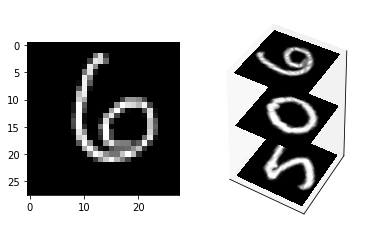

Sample: 100 - Class: [6] - Label Vector: [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.] 
Sample: 101 - Class: [0] - Label Vector: [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 
Sample: 102 - Class: [5] - Label Vector: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.] 


In [4]:
samplesIdx = [100, 101, 102]  #<-- You can change these numbers here to see other samples

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.imshow(testimgs[samplesIdx[0]].reshape([28,28]), cmap='gray')


xx, yy = np.meshgrid(np.linspace(0,28,28), np.linspace(0,28,28))
X =  xx ; Y =  yy
Z =  100*np.ones(X.shape)

img = testimgs[77].reshape([28,28])
ax = fig.add_subplot(122, projection='3d')
ax.set_zlim((0,200))


offset=200
for i in samplesIdx:
    img = testimgs[i].reshape([28,28]).transpose()
    ax.contourf(X, Y, img, 200, zdir='z', offset=offset, cmap="gray")
    offset -= 100

    ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()


for i in samplesIdx:
    print "Sample: {0} - Class: {1} - Label Vector: {2} ".format(i, np.nonzero(testlabels[i])[0], testlabels[i])

In [5]:
n_input = 28
n_steps = 28
n_hidden = 128
n_classes = 10


learning_rate = 0.001
training_iters = 100000
batch_size = 100
display_step = 10

In [6]:
x = tf.placeholder(tf.float32, shape=[None, n_steps, n_input], name="x")
y = tf.placeholder(tf.float32, shape=[None, n_classes], name="y")

In [7]:
weights = {'out': tf.Variable(tf.random_normal([n_hidden, n_classes]))}
biases = {'out': tf.Variable(tf.random_normal([n_classes]))}

In [8]:
lstm_cell = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0)

In [9]:
outputs, states = tf.nn.dynamic_rnn(lstm_cell, inputs= x, dtype= tf.float32)

In [11]:
output = tf.reshape(tf.split(outputs, 28, axis=1, num=None, name='split')[-1], [-1,128])
pred = tf.matmul(output, weights['out']) + biases['out']

In [12]:
pred

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

In [13]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))
optimizer = tf.train.AdamOptimizer(learning_rate= learning_rate).minimize(cost)

In [16]:
correct_pred = tf.equal(tf.argmax(y, 1), tf.argmax(pred, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [17]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    step = 1
    while step * batch_size < training_iters:
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        batch_x = batch_x.reshape(batch_size, n_steps, n_input)
        
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        
        if step % display_step == 0:
            acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
            loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            print("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                "{:.6f}".format(loss) + ", Training Accuracy= " + \
                "{:.5f}".format(acc))
        step += 1
    print("Optimization Finished!")
    
    test_len = 128
    test_data = mnist.test.images[:test_len].reshape((-1, n_steps, n_input))
    test_label = mnist.test.labels[:test_len]
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: test_data, y: test_label}))

Iter 1000, Minibatch Loss= 1.918817, Training Accuracy= 0.31000
Iter 2000, Minibatch Loss= 1.574195, Training Accuracy= 0.52000
Iter 3000, Minibatch Loss= 1.291865, Training Accuracy= 0.54000
Iter 4000, Minibatch Loss= 1.025985, Training Accuracy= 0.68000
Iter 5000, Minibatch Loss= 1.189038, Training Accuracy= 0.65000
Iter 6000, Minibatch Loss= 0.674470, Training Accuracy= 0.78000
Iter 7000, Minibatch Loss= 0.905020, Training Accuracy= 0.70000
Iter 8000, Minibatch Loss= 0.578795, Training Accuracy= 0.83000
Iter 9000, Minibatch Loss= 0.487790, Training Accuracy= 0.86000
Iter 10000, Minibatch Loss= 0.508951, Training Accuracy= 0.81000
Iter 11000, Minibatch Loss= 0.332028, Training Accuracy= 0.88000
Iter 12000, Minibatch Loss= 0.351810, Training Accuracy= 0.88000
Iter 13000, Minibatch Loss= 0.326459, Training Accuracy= 0.88000
Iter 14000, Minibatch Loss= 0.346899, Training Accuracy= 0.87000
Iter 15000, Minibatch Loss= 0.308595, Training Accuracy= 0.88000
Iter 16000, Minibatch Loss= 0.4042

In [18]:
sess.close()